# Introduction

TBC

In [1]:
#Import Modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import random
import re

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

plt.style.use('bmh')
#sns.set_palette('ocean_r')

In [2]:
# Import Datasets

df_trans = pd.read_csv('datasets/QVI_transaction_data.csv')
df_cust = pd.read_csv('datasets/QVI_purchase_behaviour.csv')

### Transaction Data Exploration

In [3]:
# Explore first 10 rows
display(df_trans.head(10))

# Check shape
display(df_trans.shape)

# Check for nulls and datatypes
display(df_trans.info())

# Understand unique values in categorical columns
display(df_trans.nunique())

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


(264836, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


None

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64

---
- DATE column contains 364 unique values, ranging from 43282 to 43646. Format is CSV/Excel format, which begins on 1899-12-30.
- STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR datatype is integer, we'll convert these to Categories
---

###### Data Cleaning

In [4]:
## Replace values in DATE

# Convert to datetime - Begin 1899-12-30
df_trans['DATE'] = pd.to_datetime(df_trans['DATE'], unit='D', origin='1899-12-30')

In [32]:
# Determine missing date value
transactions = df_trans.groupby('DATE').TXN_ID.count().reset_index()
transactions.describe()

,TXN_ID
count,364.000000
mean,677.857143
std,33.687536
min,607.000000
25%,658.000000
50%,674.000000
75%,694.250000
max,865.000000


In [6]:
## Convert STORE_NBR, LYLTY_CARD_NBR, TXN_ID, PROD_NBR to category dtype.
cols = ['STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR']

for col in cols:
    df_trans[col] = df_trans[col].astype('category')


In [7]:
#Describe the data
display(df_trans.describe(include='all', datetime_is_numeric=True).T)

#data info
display(df_trans.info())

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
DATE,264836,NaN,NaN,NaN,2018-12-30 00:52:12.879262208,2018-07-01 00:00:00,2018-09-30 00:00:00,2018-12-30 00:00:00,2019-03-31 00:00:00,2019-06-30 00:00:00,NaN
STORE_NBR,264836,272,226,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LYLTY_CARD_NBR,264836,72637,172032,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TXN_ID,264836,263127,1162,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PROD_NBR,264836,114,102,3304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PROD_NAME,264836,114,Kettle Mozzarella Basil & Pesto 175g,3304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PROD_QTY,264836,NaN,NaN,NaN,1.90731,1,2,2,2,200,0.643654
TOT_SALES,264836,NaN,NaN,NaN,7.3042,1.5,5.4,7.4,9.2,650,3.08323


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  category      
 2   LYLTY_CARD_NBR  264836 non-null  category      
 3   TXN_ID          264836 non-null  category      
 4   PROD_NBR        264836 non-null  category      
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: category(4), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 25.9+ MB


None

---
- 272 unique stores included in the dataset, with store 226 having the most amount of transactions
    - Does this store have a higher proportion of customer type than others?
- 72,637 unique loyalty cards present in the dataset
- 263,127 transaction IDs
    - Need to understand what the duplicate IDs represent
- 114 different products
- Average sale is 1.9 units
    - Looks to be an outlier of 200, will need to explore this
- Average sale price is $7.3
---

The below code is to extract out the packet size and brand name, from the information in the PROD_NAME column.

In [8]:
## Parse out packet size

# Explore column
#display(set(df_trans.PROD_NAME.values))

# Reviewing the list, we can see that all values contain the chip size, and it's either a 2 digit or 3 digit number.

df_trans['packet_size'] = df_trans.PROD_NAME.str.extract(r'(\d+)', expand=True)

# Check

df_trans.packet_size.unique()

array(['175', '170', '150', '300', '330', '210', '270', '220', '125',
       '110', '134', '380', '180', '165', '135', '250', '200', '160',
       '190', '90', '70'], dtype=object)

Output of packet sizes seems reasonable - 70g to 380g

In [9]:
## Parse out brand

# Regex to get individual words
text = df_trans.PROD_NAME.to_string()
words_pattern = '[a-zA-Z]+'
word_list = re.findall(words_pattern, text, flags=re.IGNORECASE)

# Explore word counts
pd.value_counts(np.array(word_list))

g                  258772
Chips               49770
Kettle              41288
Smiths              28860
Salt                27976
Cheese              27890
Pringles            25102
Doritos             24962
Crinkle             23960
Corn                22063
Original            21560
Cut                 20754
Chip                18645
Chicken             18577
Salsa               18094
Cream               16926
Chilli              15390
Sea                 14145
Thins               14075
Sour                13882
Crisps              12607
Vinegar             12402
RRD                 11894
Sweet               11060
Infuzions           11057
Supreme             10963
Chives              10951
WW                  10320
Popd                 9693
Cobs                 9693
Tortilla             9580
Tostitos             9471
Twisties             9454
BBQ                  9434
Sensations           9429
Lime                 9347
Paso                 9324
Old                  9324
Dip         

There appears to be 'Salsa' and 'Dip' in this dataset. Spot checking the data, it seems like Dip is found for one chip packet, so we'll need to leave some instance of that in the set. Looks safe to remove any rows that have 'Salsa' in it, as it appears 'Dip' doesn't appear on it's own, rather it's found in conjunction with 'Salsa'

In [10]:
# Check length prior
display(len(df_trans))

# Word to remove
word_remove = ['Salsa']

# Filter dataframe
df_trans = df_trans[df_trans.PROD_NAME.str.contains('Salsa')==False]

# Check length after
display(len(df_trans))

## Difference is 18094, which matches the count in the output above for 'Salsa'

264836

246742

In [11]:
# Take first word of string as brand name

df_trans['brand_name'] = df_trans.PROD_NAME.str.split().str.get(0)

In [12]:
df_trans.head(200)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,packet_size,brand_name
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80,150,Kettle
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.70,330,Smiths
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.60,210,Grain
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.90,150,Doritos
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.20,210,Grain
10,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.70,330,Smiths


In [13]:
## Need to clean up brand name, I.E Red & RRD is the same. WW is woolworths etc
df_trans.brand_name.value_counts()

Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3185
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: brand_name, dtype: int64

In [14]:
# Based on above list, I was able to combine certain names for brands. I.E. RRD & Red are for red rock deli.

# Create dictionary for these relationships

brand_map = {'Grain': 'Grain Waves',
             'GrnWves': 'Grain Waves',
             'Doritos': 'Doritos',
             'Dorito': 'Doritos',
             'Smiths': 'Smiths',
             'Smith': 'Smiths',
             'RRD': 'Red Rock Deli',
             'Red': 'Red Rock Deli',
             'WW': 'Woolworths',
             'Woolworths': 'Woolworths',
             'Natural': 'Natural Chip Company',
             'NCC': 'Natural Chip Company',
             'Snbts': 'Sunbites',
             'Sunbites': 'Sunbites',
             'Infuzions': 'Infuzions',
             'Infzns': 'Infuzions'}

# Map to brand_name column
df_trans['brand_name'] = df_trans.brand_name.replace(brand_map)

# Check 
df_trans.brand_name.value_counts()

Kettle                  41288
Smiths                  30353
Doritos                 25226
Pringles                25102
Red Rock Deli           16321
Infuzions               14201
Thins                   14075
Woolworths              11836
Cobs                     9693
Tostitos                 9471
Twisties                 9454
Grain Waves              7740
Natural Chip Company     7469
Tyrrells                 6442
Cheezels                 4603
CCs                      4551
Sunbites                 3008
Cheetos                  2927
Burger                   1564
French                   1418
Name: brand_name, dtype: int64

In [15]:
# Review dataframe to check cleaning results look reasonable
df_trans.head(200)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,packet_size,brand_name
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00,175,Natural Chip Company
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80,150,Kettle
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.70,330,Smiths
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.60,210,Grain Waves
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.90,150,Doritos
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.20,210,Grain Waves
10,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.70,330,Smiths


---

##### Categorical Variables - Exploration

In [16]:
## Understand duplicate TXN_IDs

# Review rows of duplicated TXN_ID
mask = df_trans.TXN_ID.duplicated(keep=False)
display(df_trans[mask].head(20))

# Check to see largest number of duplicated values
display(set(df_trans.TXN_ID.value_counts().values))

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,packet_size,brand_name
41,2019-05-20,55,55073,48887,4,Dorito Corn Chp Supreme 380g,1,3.25,380,Doritos
42,2019-05-20,55,55073,48887,113,Twisties Chicken270g,1,4.60,270,Twisties
376,2019-01-10,7,7364,7739,50,Tostitos Lightly Salted 175g,2,8.80,175,Tostitos
377,2019-01-10,7,7364,7739,20,Doritos Cheese Supreme 330g,2,11.40,330,Doritos
418,2018-10-18,12,12301,10982,50,Tostitos Lightly Salted 175g,2,8.80,175,Tostitos
419,2018-10-18,12,12301,10982,93,Doritos Corn Chip Southern Chicken 150g,2,7.80,150,Doritos
475,2018-09-08,16,16427,14546,99,Pringles Sthrn FriedChicken 134g,1,3.70,134,Pringles
476,2018-09-08,16,16427,14546,81,Pringles Original Crisps 134g,1,3.70,134,Pringles
510,2018-08-03,19,19272,16683,7,Smiths Crinkle Original 330g,2,11.40,330,Smiths
511,2018-08-03,19,19272,16683,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.60,110,Infuzions


{0, 1, 2, 3}

Seems as though if a customer purchases different chip packets, it's recorded under the same transaction ID, though on a different row. Based on this it appears that in this dataset a customer won't purchase more than 3 variations of chip packets in a single transaction.

---

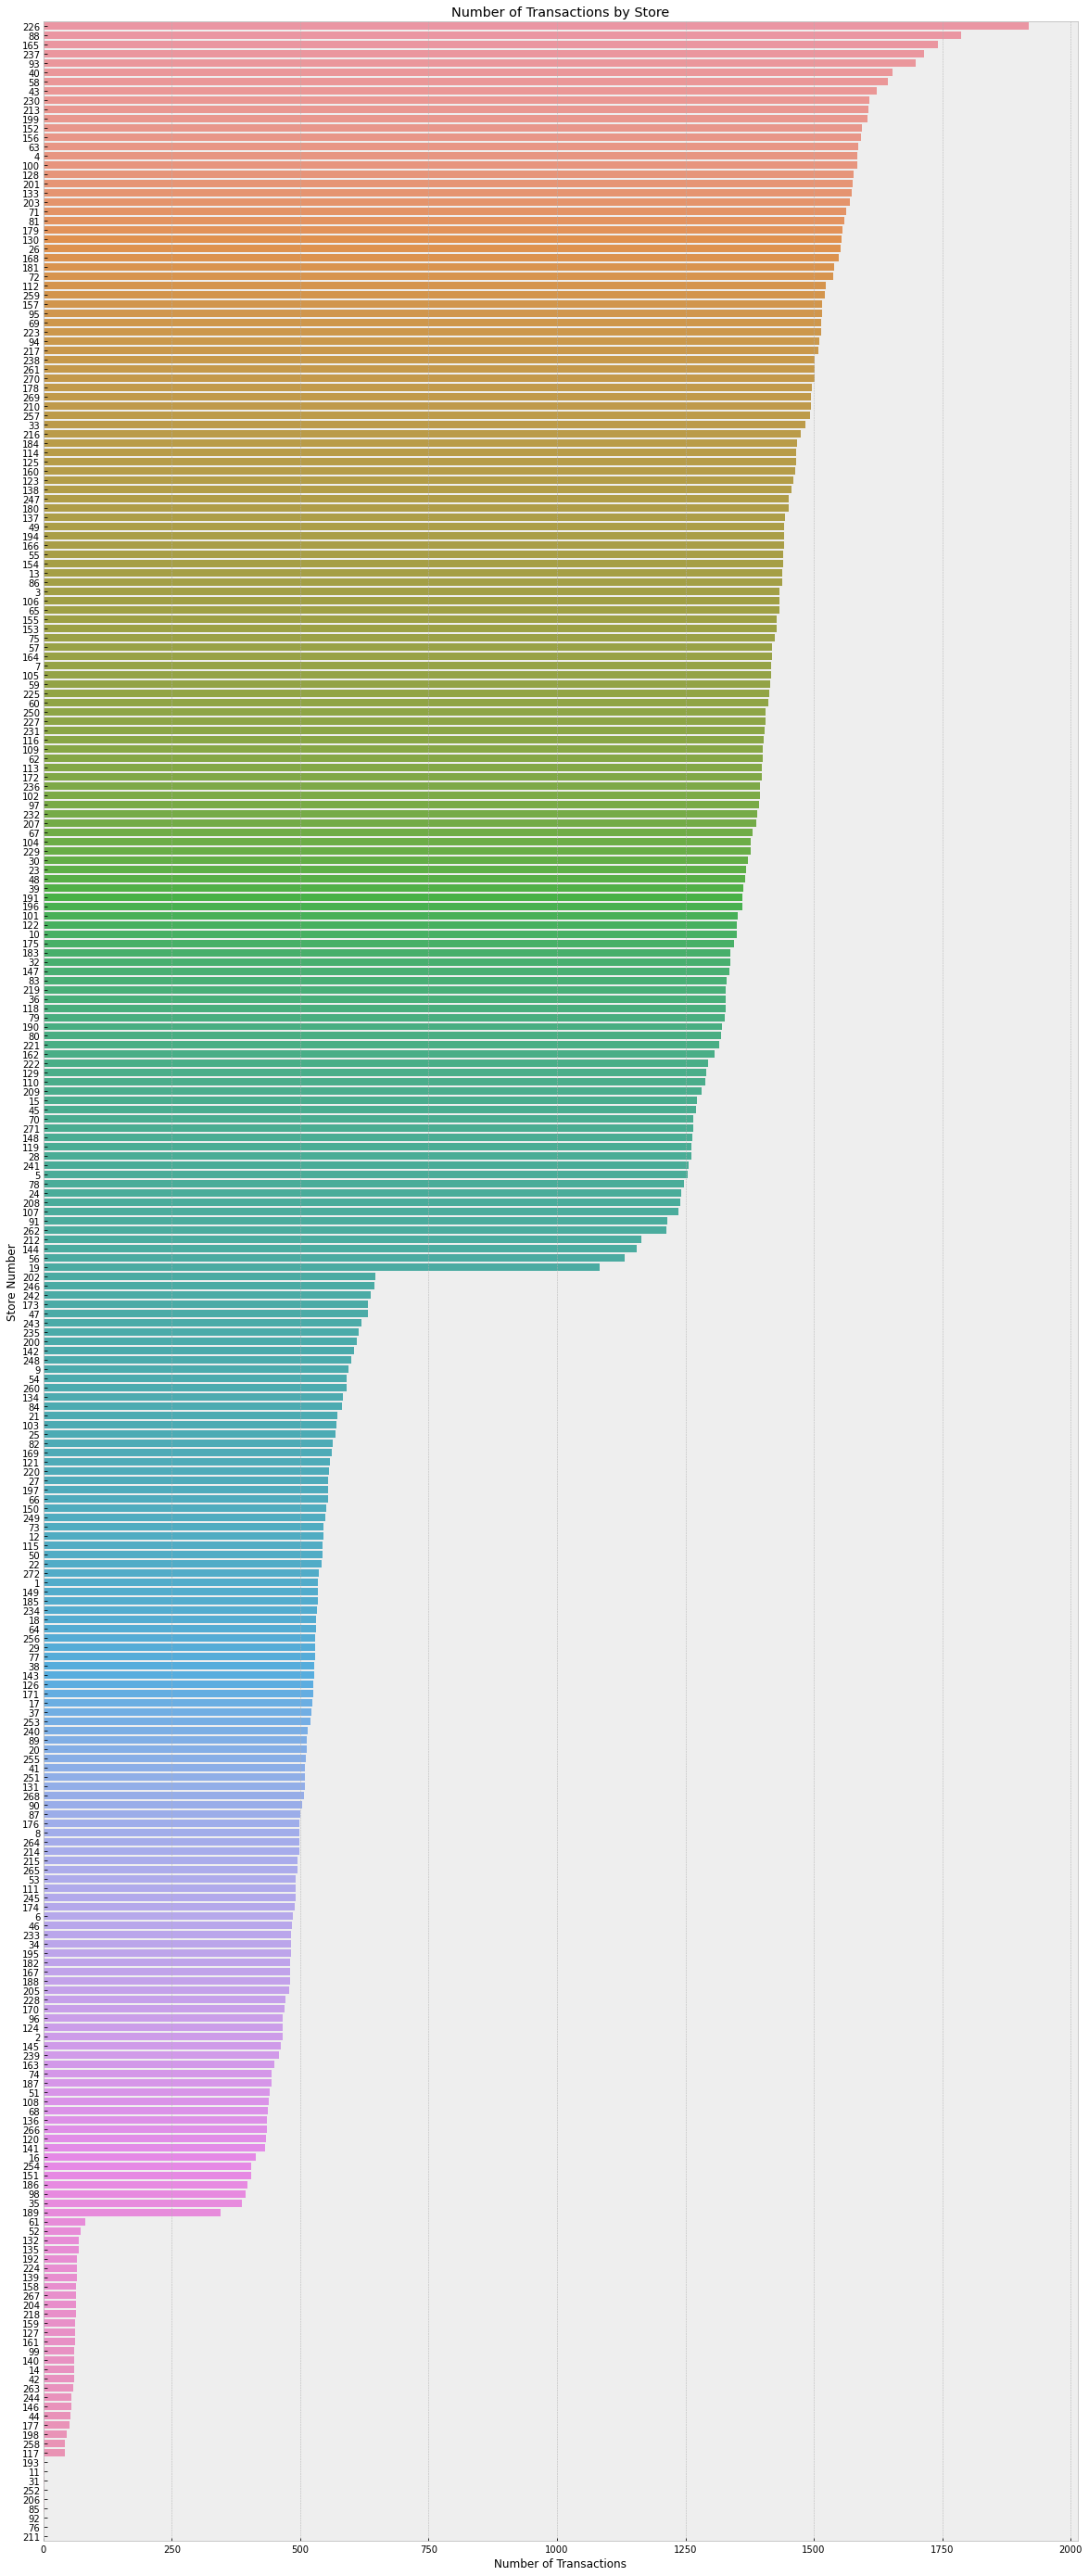

In [17]:
## STORE_NBR

# Groupby Stores
df_grouped = df_trans.groupby('STORE_NBR').agg({'TXN_ID': 'count'}).reset_index()

# Visualisation

fig, ax = plt.subplots(figsize=(20,50))

sns.barplot(data=df_grouped, y='STORE_NBR', x='TXN_ID', ax=ax,
           order=df_grouped.sort_values('TXN_ID', ascending=False).STORE_NBR)

ax.set_title('Number of Transactions by Store')
ax.set_ylabel('Store Number')
ax.set_xlabel('Number of Transactions')

plt.show()

We can roughly group the stores into 3-4 categories, which can be characterised by the steep drop offs. This may be indicative of the size or location of each of the stores. 

---

In [18]:
# Loyalty Card Number

df_trans.LYLTY_CARD_NBR.nunique()

71288

This dataset contains purchasing information of 71287 customers

---

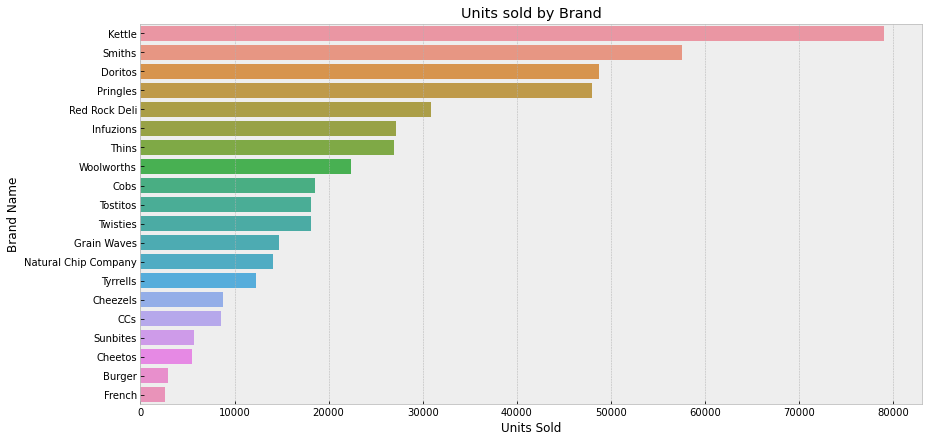

,PROD_QTY
brand_name,
Kettle,16.79
Smiths,12.23
Doritos,10.35
Pringles,10.20
Red Rock Deli,6.56
Infuzions,5.76
Thins,5.72
Woolworths,4.74
Cobs,3.94


In [19]:
# Brand Name

# Group by brand name, and units sold

df_grouped = df_trans.groupby('brand_name').agg({'PROD_QTY': 'sum'}).sort_values(by='PROD_QTY', ascending=False)

# Draw plot
fig, ax = plt.subplots(figsize=(14,7))

# Create barplot
sns.barplot(data=df_grouped, y=df_grouped.index, x='PROD_QTY', ax=ax)

# Formatting
ax.set_title('Units sold by Brand')
ax.set_ylabel('Brand Name')
ax.set_xlabel('Units Sold')

plt.show()

# Show % 
display(df_grouped.apply(lambda x: np.round((x/x.sum()*100),2), axis=0))

Kettle, Smiths, Doritos, Pringles account for 49.53% of total units sold.

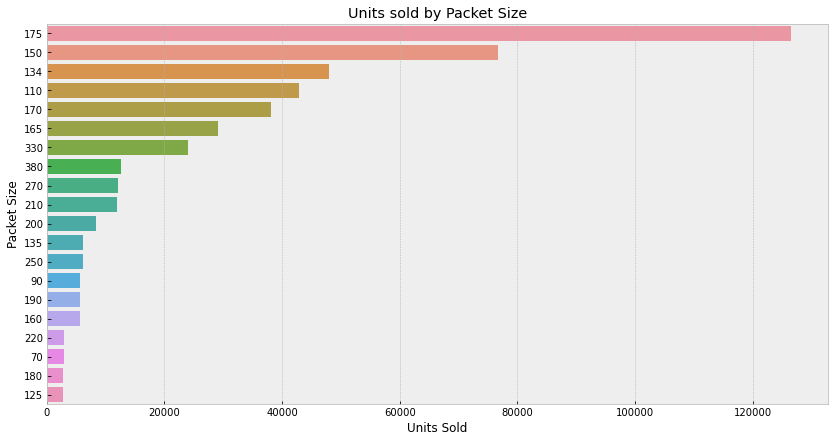

,PROD_QTY
packet_size,
175,26.86
150,16.28
134,10.20
110,9.10
170,8.09
165,6.17
330,5.10
380,2.69
270,2.56


In [20]:
# Packet Size

# Group by brand name, and units sold

df_grouped = df_trans.groupby('packet_size').agg({'PROD_QTY': 'sum'}).sort_values(by='PROD_QTY', ascending=False)

# Draw plot
fig, ax = plt.subplots(figsize=(14,7))

# Create barplot
sns.barplot(data=df_grouped, y=df_grouped.index, x='PROD_QTY', ax=ax)

# Formatting
ax.set_title('Units sold by Packet Size')
ax.set_ylabel('Packet Size')
ax.set_xlabel('Units Sold')

plt.show()

# Show % 
display(df_grouped.apply(lambda x: np.round((x/x.sum()*100),2), axis=0))

175, 150, 134 and 110 gram packets account for more than 50% of the units sold

##### Numerical Variables - Exploration

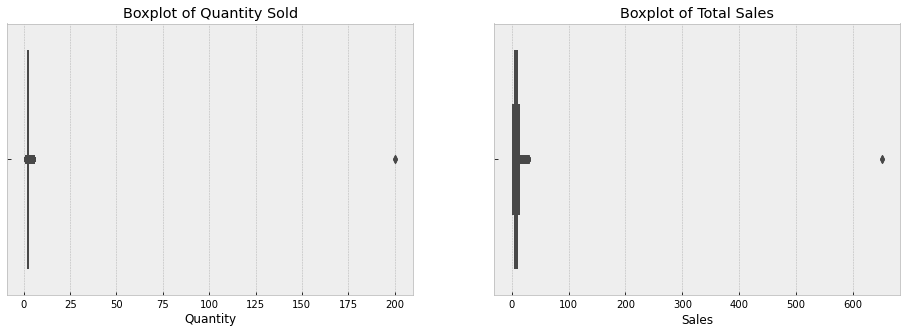

In [21]:
# Numerical Variables - Visualisations

fig, ax = plt.subplots(1,2,figsize=(16,5))

# PROD_QTY
sns.boxplot(data=df_trans, x='PROD_QTY', ax=ax[0])
ax[0].set_title('Boxplot of Quantity Sold')
ax[0].set_xlabel('Quantity')

# TOT_SALES
sns.boxplot(data=df_trans, x='TOT_SALES', ax=ax[1])
ax[1].set_title('Boxplot of Total Sales')
ax[1].set_xlabel('Sales')

plt.show()

There is clearly an outlier from the visuals above, we'll first investigate these rows, and make a decision on what to do from there.

In [22]:
# Check rows with outliers
display(df_trans[df_trans.PROD_QTY > 50])

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,packet_size,brand_name
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Doritos
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,380,Doritos


This looks to be for the same customer on two different occasions. We can assume this unusual purchase may have been for commerical purposes, and can be removed for the purpose of this analysis, as we're concerned on retail customers.

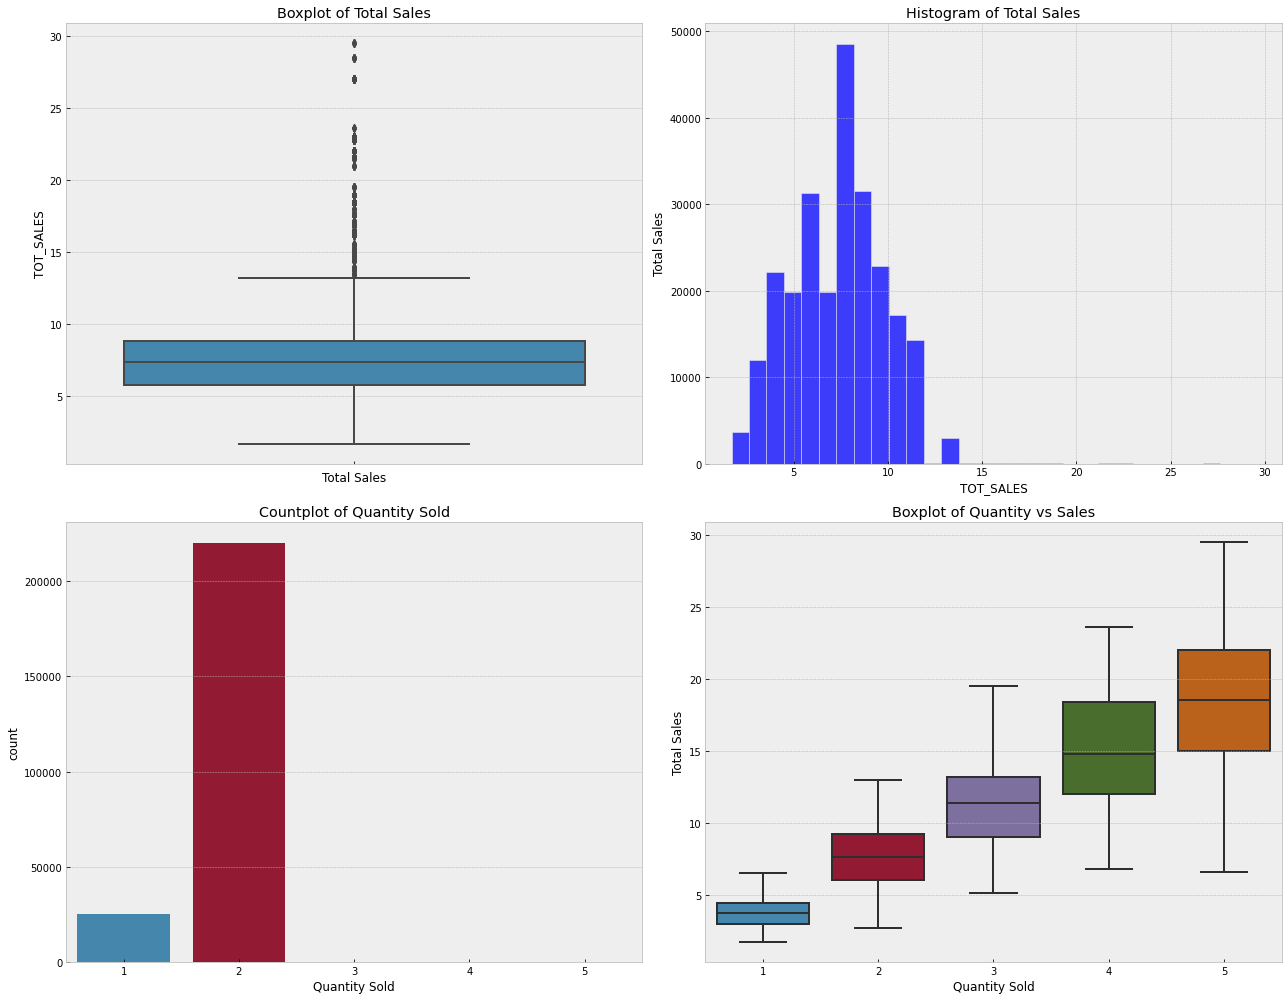

In [23]:
# Filter out outliers
df_trans = df_trans[df_trans.PROD_QTY < 50]

# Re-run visuals
fig, ax = plt.subplots(2,2,figsize=(18,14))

# TOT_SALES
sns.boxplot(data=df_trans, y='TOT_SALES', ax=ax[0,0])
ax[0,0].set_title('Boxplot of Total Sales')
ax[0,0].set_xlabel('Total Sales')

sns.histplot(data=df_trans, x='TOT_SALES', ax=ax[0,1], bins=30)
ax[0,1].set_title('Histogram of Total Sales')
ax[0,1].set_ylabel('Total Sales')

# PROD_QTY
sns.countplot(data=df_trans, x='PROD_QTY', ax=ax[1,0])
ax[1,0].set_title('Countplot of Quantity Sold')
ax[1,0].set_xlabel('Quantity Sold')

# PROD_QTY vs TOT_SALES
sns.boxplot(data=df_trans, x='PROD_QTY', y='TOT_SALES', ax=ax[1,1])
ax[1,1].set_title('Boxplot of Quantity vs Sales')
ax[1,1].set_xlabel('Quantity Sold')
ax[1,1].set_ylabel('Total Sales')

plt.tight_layout()
plt.show()

- Half of the transactions had total sales between $5.4 and \\$9.2. 
- Most customers would purchase 2 chip packets per transaction
- We see higher variance in total sales, as the quantity of chips sold increases

---

In [24]:
df_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,packet_size,brand_name
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural Chip Company
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle


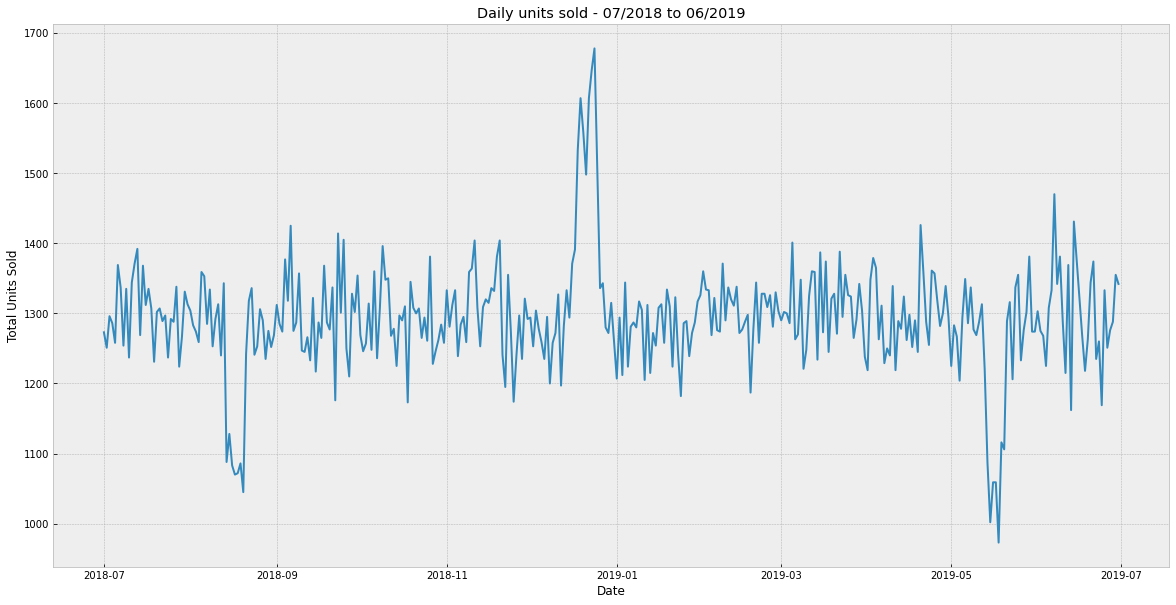

In [25]:
# Group by date and sum of total units sold
df_grouped = df_trans.groupby('DATE').agg({'PROD_QTY': 'sum'})

# Draw figure and axes
fig, ax = plt.subplots(figsize=(20,10))

#Plot line
sns.lineplot(x=df_grouped.index, y='PROD_QTY', data=df_grouped, ax=ax)

#Formatting
ax.set_title('Daily units sold - 07/2018 to 06/2019')
ax.set_ylabel('Total Units Sold')
ax.set_xlabel('Date')

plt.show()

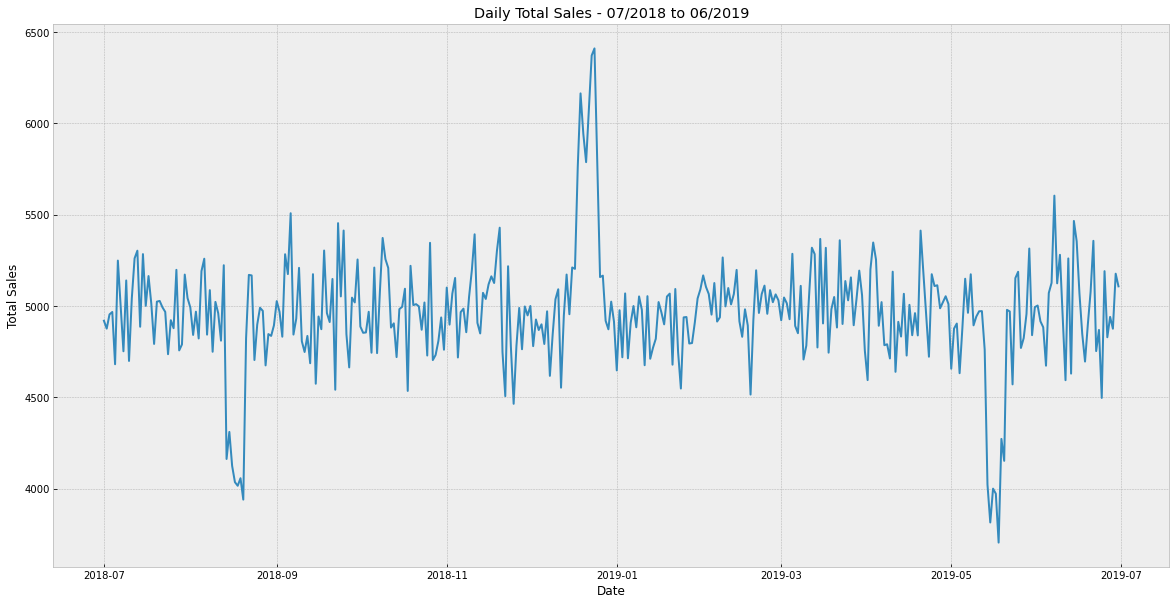

In [26]:
# Group by date and sum of total sales
df_grouped = df_trans.groupby('DATE').agg({'TOT_SALES': 'sum'})

# Draw figure and axes
fig, ax = plt.subplots(figsize=(20,10))

#Plot line
sns.lineplot(x=df_grouped.index, y='TOT_SALES', data=df_grouped, ax=ax)

#Formatting
ax.set_title('Daily Total Sales - 07/2018 to 06/2019')
ax.set_ylabel('Total Sales')
ax.set_xlabel('Date')

plt.show()

In [27]:
df_grouped

,TOT_SALES
DATE,
2018-07-01,4920.10
2018-07-02,4877.00
2018-07-03,4954.70
2018-07-04,4968.10
2018-07-05,4682.00
2018-07-06,5249.40
2018-07-07,4998.70
2018-07-08,4753.00
2018-07-09,5140.60


In [28]:
##TODO:

# Create Time Series 


#### Customer Data Exploration

In [29]:
# Explore first 10 rows
df_cust.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream
